1. Data Cleaning & Exploration

 - Loading the dataset

In [23]:
import pandas as pd
df = pd.read_csv('Chocolate Sales.csv')
df

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184
...,...,...,...,...,...,...
1089,Karlen McCaffrey,Australia,Spicy Special Slims,17-May-22,"$4,410",323
1090,Jehu Rudeforth,USA,White Choc,07-Jun-22,"$6,559",119
1091,Ches Bonnell,Canada,Organic Choco Syrup,26-Jul-22,$574,217
1092,Dotty Strutley,India,Eclairs,28-Jul-22,"$2,086",384


- Checking basic information

In [24]:
# Number of rows and columns
df.shape

(1094, 6)

In [25]:
# Data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   1094 non-null   object
 1   Country        1094 non-null   object
 2   Product        1094 non-null   object
 3   Date           1094 non-null   object
 4   Amount         1094 non-null   object
 5   Boxes Shipped  1094 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 51.4+ KB


- Preview the data

In [26]:
# First 5 rows
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184


In [27]:
# Last 5 rows
df.tail()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
1089,Karlen McCaffrey,Australia,Spicy Special Slims,17-May-22,"$4,410",323
1090,Jehu Rudeforth,USA,White Choc,07-Jun-22,"$6,559",119
1091,Ches Bonnell,Canada,Organic Choco Syrup,26-Jul-22,$574,217
1092,Dotty Strutley,India,Eclairs,28-Jul-22,"$2,086",384
1093,Karlen McCaffrey,India,70% Dark Bites,23-May-22,"$5,075",344


In [ ]:
# Remove $ sign
df['Amount'] = df['Amount'].replace({'\$': ''}, regex=True)

# Remove , sign and convert to float
df['Amount'] = df['Amount'].replace({',': ''}, regex=True).astype(float)
df

In [ ]:
# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

2.  Descriptive Statistics

In [30]:
#What is the total sales amount?
total_sales = df['Amount'].sum()
print(f"Total sales amount: {total_sales}")


Total sales amount: 6183625.0


In [31]:
#What is the average amount per sale?
average_sale = df['Amount'].mean()
print(f"Average amount per sale: {average_sale}")

Average amount per sale: 5652.308043875685


In [32]:
#What is the total number of boxes shipped?
total_boxes = df['Boxes Shipped'].sum()
print(f'Total number of boxes shipped: {total_boxes}')

Total number of boxes shipped: 177007


In [33]:
#How many unique salespeople are there?
unique_salespeople = df['Sales Person'].nunique()
print(f'Unique Sales People: {unique_salespeople}')

Unique Sales People: 25


GROUPING AND AGGREGATION

In [34]:
#Total sales by country
sales_by_country = df.groupby('Country')['Amount'].sum()
sales_by_country

Country
Australia      1137367.0
Canada          962899.0
India          1045800.0
New Zealand     950418.0
UK             1051792.0
USA            1035349.0
Name: Amount, dtype: float64

In [35]:
#Total sales by product
sales_by_product = df.groupby('Product')['Amount'].sum()
sales_by_product

Product
50% Dark Bites          341712.0
70% Dark Bites          211610.0
85% Dark Bars           299229.0
99% Dark & Pure         299796.0
After Nines             261331.0
Almond Choco            277536.0
Baker's Choco Chips     249613.0
Caramel Stuffed Bars    231588.0
Choco Coated Almonds    241486.0
Drinking Coco           256655.0
Eclairs                 312445.0
Fruit & Nut Bars        259147.0
Manuka Honey Choco      275541.0
Milk Bars               269248.0
Mint Chip Choco         283969.0
Orange Choco            256144.0
Organic Choco Syrup     294700.0
Peanut Butter Cubes     324842.0
Raspberry Choco         264740.0
Smooth Sliky Salty      349692.0
Spicy Special Slims     293454.0
White Choc              329147.0
Name: Amount, dtype: float64

In [36]:
#Which salesperson made the most sales (by amount)?
top_salesperson = df.groupby('Sales Person')['Amount'].sum().idxmax()
print(f"Salesperson with the most sales: {top_salesperson}")

Salesperson with the most sales: Ches Bonnell


In [37]:
# Group sales by salesperson and sum the sales amount
sales_by_salesperson = df.groupby('Sales Person')['Amount'].sum()

# Find the salesperson with the least sales
least_salesperson = sales_by_salesperson.idxmin()  # Name of the salesperson with the least sales
least_sales_amount = sales_by_salesperson.min()    # Sales amount of the least performing salesperson

# Display the result
print(f"The salesperson with the least sales is {least_salesperson} with a total of ${least_sales_amount:.2f}")


The salesperson with the least sales is Wilone O'Kielt with a total of $138523.00


In [38]:
#Total boxes shipped by each salesperson
boxes_by_salesperson = df.groupby('Sales Person')['Boxes Shipped'].sum()
boxes_by_salesperson


Sales Person
Andria Kimpton         6448
Barr Faughny           6366
Beverie Moffet         9214
Brien Boise            8102
Camilla Castle         5374
Ches Bonnell           7522
Curtice Advani         7074
Dennison Crosswaite    8767
Dotty Strutley         6853
Gigi Bohling           6303
Gunar Cockshoot        6677
Husein Augar           5849
Jan Morforth           7661
Jehu Rudeforth         7246
Kaine Padly            7253
Karlen McCaffrey       9658
Kelci Walkden          8702
Madelene Upcott        7279
Mallorie Waber         5980
Marney O'Breen         8043
Oby Sorrel             8608
Rafaelita Blaksland    4297
Roddy Speechley        6899
Van Tuxwell            6799
Wilone O'Kielt         4033
Name: Boxes Shipped, dtype: int64

In [39]:
#Monthly total sales

df['Month'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Amount'].sum()
print(monthly_sales)

Month
2022-01    896105.0
2022-02    699377.0
2022-03    749483.0
2022-04    674051.0
2022-05    752892.0
2022-06    865144.0
2022-07    803425.0
2022-08    743148.0
Freq: M, Name: Amount, dtype: float64


FILTERING AND SORTING

In [40]:
#Find all sales made in a specific country, e.g., 'USA

sales_usa = df[df['Country'] == 'USA']
sales_usa

,Sales Person,Country,Product,Date,Amount,Boxes Shipped,Month
11,Barr Faughny,USA,Orange Choco,2022-03-10,3703.0,11,2022-03
17,Roddy Speechley,USA,Smooth Sliky Salty,2022-04-05,3017.0,140,2022-04
21,Gunar Cockshoot,USA,Spicy Special Slims,2022-02-17,1267.0,157,2022-02
22,Marney O'Breen,USA,After Nines,2022-05-30,4753.0,163,2022-05
27,Husein Augar,USA,Eclairs,2022-07-07,4025.0,112,2022-07
...,...,...,...,...,...,...,...
1062,Dennison Crosswaite,USA,70% Dark Bites,2022-03-15,658.0,77,2022-03
1064,Gigi Bohling,USA,70% Dark Bites,2022-01-14,7364.0,196,2022-01
1081,Dennison Crosswaite,USA,Smooth Sliky Salty,2022-05-12,11781.0,91,2022-05
1082,Brien Boise,USA,Raspberry Choco,2022-01-12,672.0,194,2022-01


In [41]:
Total_usa_sales = df[df['Country'] == 'New Zealand'][['Amount', 'Boxes Shipped']].sum()
print("Total sales in the USA:")
print(Total_usa_sales)


Total sales in the USA:
Amount           950418.0
Boxes Shipped     26580.0
dtype: float64


In [42]:
Total_usa_sales = df[df['Country'] == 'Canada'][['Amount', 'Boxes Shipped']].sum()
print("Total sales in the USA:")
print(Total_usa_sales)

Total sales in the USA:
Amount           962899.0
Boxes Shipped     31221.0
dtype: float64


In [43]:
#Find all sales of Peanut Butter Cubes
PeanutButterCubes = df[df['Product'] == 'Peanut Butter Cubes']
PeanutButterCubes

,Sales Person,Country,Product,Date,Amount,Boxes Shipped,Month
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,4501.0,91,2022-07
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,12726.0,342,2022-04
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,13685.0,184,2022-02
14,Marney O'Breen,New Zealand,Peanut Butter Cubes,2022-08-03,8379.0,173,2022-08
45,Kaine Padly,USA,Peanut Butter Cubes,2022-02-16,6790.0,188,2022-02
69,Jan Morforth,USA,Peanut Butter Cubes,2022-07-22,9037.0,102,2022-07
73,Andria Kimpton,New Zealand,Peanut Butter Cubes,2022-06-20,959.0,265,2022-06
167,Roddy Speechley,India,Peanut Butter Cubes,2022-02-11,10283.0,21,2022-02
177,Marney O'Breen,India,Peanut Butter Cubes,2022-01-10,6489.0,146,2022-01
181,Kaine Padly,Canada,Peanut Butter Cubes,2022-07-04,3269.0,176,2022-07


In [44]:
#Find the top 5 highest value sales
top_5_sales = df.nlargest(5, 'Amount')
top_5_sales

,Sales Person,Country,Product,Date,Amount,Boxes Shipped,Month
543,Ches Bonnell,India,Peanut Butter Cubes,2022-01-27,22050.0,208,2022-01
135,Van Tuxwell,India,Organic Choco Syrup,2022-05-16,19929.0,174,2022-05
751,Rafaelita Blaksland,New Zealand,Eclairs,2022-02-07,19481.0,51,2022-02
66,Van Tuxwell,Australia,Organic Choco Syrup,2022-08-10,19453.0,14,2022-08
589,Curtice Advani,India,Smooth Sliky Salty,2022-04-19,19327.0,135,2022-04


In [45]:
#Find sales where more than 100 boxes were shipped
large_shipment_sales = df[df['Boxes Shipped'] > 100]
large_shipment_sales

,Sales Person,Country,Product,Date,Amount,Boxes Shipped,Month
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,5320.0,180,2022-01
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,12726.0,342,2022-04
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,13685.0,184,2022-02
6,Oby Sorrel,UK,99% Dark & Pure,2022-01-25,13685.0,176,2022-01
9,Brien Boise,Australia,99% Dark & Pure,2022-07-04,2835.0,102,2022-07
...,...,...,...,...,...,...,...
1089,Karlen McCaffrey,Australia,Spicy Special Slims,2022-05-17,4410.0,323,2022-05
1090,Jehu Rudeforth,USA,White Choc,2022-06-07,6559.0,119,2022-06
1091,Ches Bonnell,Canada,Organic Choco Syrup,2022-07-26,574.0,217,2022-07
1092,Dotty Strutley,India,Eclairs,2022-07-28,2086.0,384,2022-07


VISUALIZATION

In [ ]:
pip install matplotlib

In [47]:
import matplotlib.pyplot as plt

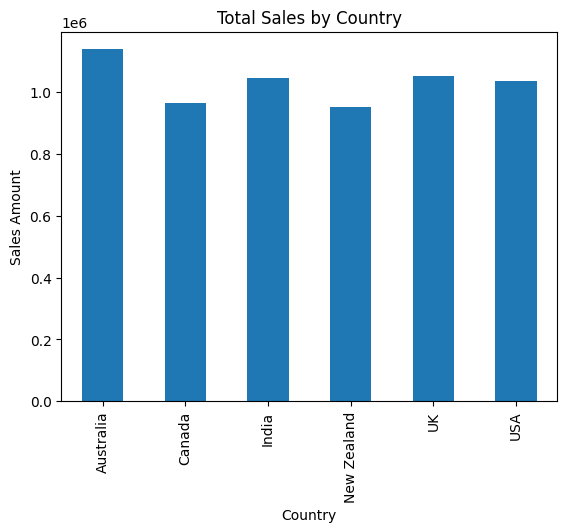

In [48]:
#Bar chart of total sales by country

sales_by_country = df.groupby('Country')['Amount'].sum()
sales_by_country.plot(kind='bar')
plt.title('Total Sales by Country')
plt.ylabel('Sales Amount')
plt.show()


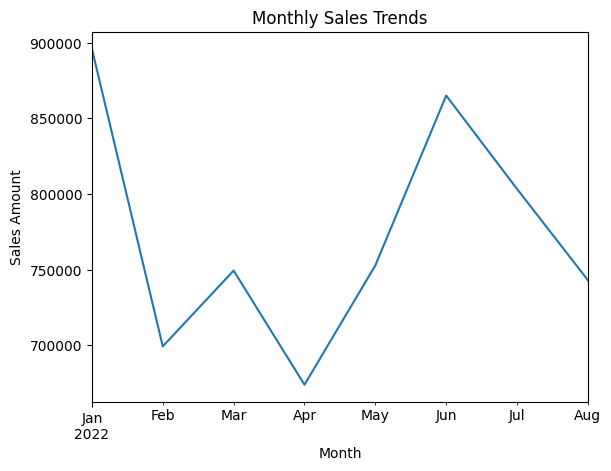

In [49]:
#Line chart of monthly sales trends

monthly_sales = df.groupby('Month')['Amount'].sum()
monthly_sales.plot(kind='line')
plt.title('Monthly Sales Trends')
plt.ylabel('Sales Amount')
plt.show()


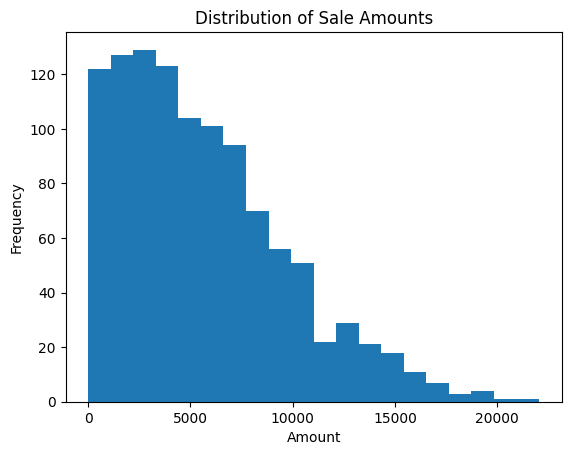

In [50]:
#Histogram of sale amounts

df['Amount'].plot(kind='hist', bins=20)
plt.title('Distribution of Sale Amounts')
plt.xlabel('Amount')
plt.show()


In [51]:
#pip install seaborn
import seaborn as sns

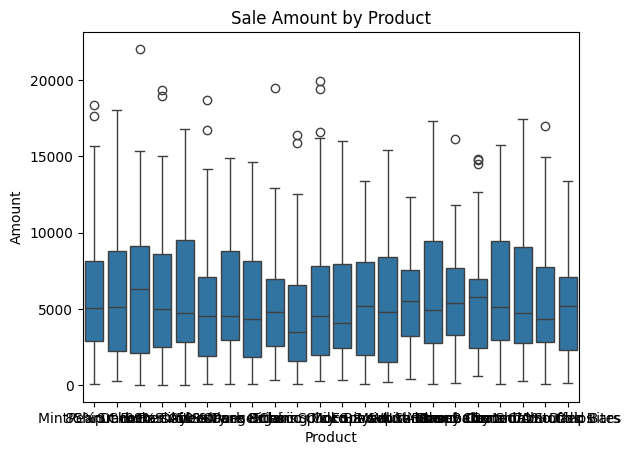

In [52]:
#Box plot of amount by product

sns.boxplot(x='Product', y='Amount', data=df)
plt.title('Sale Amount by Product')
plt.show()


GENERATE INSIGHTS

In [53]:
#Which countries have the highest sales?

top_countries = sales_by_country.sort_values(ascending=False)
print("Top countries by sales:")
top_countries

Top countries by sales:


Country
Australia      1137367.0
UK             1051792.0
India          1045800.0
USA            1035349.0
Canada          962899.0
New Zealand     950418.0
Name: Amount, dtype: float64

In [54]:
#Which products have the highest sales?

top_products = sales_by_product.sort_values(ascending=False)
print("Top products by sales:")
print(top_products)

Top products by sales:
Product
Smooth Sliky Salty      349692.0
50% Dark Bites          341712.0
White Choc              329147.0
Peanut Butter Cubes     324842.0
Eclairs                 312445.0
99% Dark & Pure         299796.0
85% Dark Bars           299229.0
Organic Choco Syrup     294700.0
Spicy Special Slims     293454.0
Mint Chip Choco         283969.0
Almond Choco            277536.0
Manuka Honey Choco      275541.0
Milk Bars               269248.0
Raspberry Choco         264740.0
After Nines             261331.0
Fruit & Nut Bars        259147.0
Drinking Coco           256655.0
Orange Choco            256144.0
Baker's Choco Chips     249613.0
Choco Coated Almonds    241486.0
Caramel Stuffed Bars    231588.0
70% Dark Bites          211610.0
Name: Amount, dtype: float64


In [55]:
#Which salesperson made the most sales?

# Sales by salesperson
sales_by_salesperson = df.groupby('Sales Person')['Amount'].sum()

# Identifying the top salesperson
top_salesperson = sales_by_salesperson.idxmax()
top_salesperson_sales = sales_by_salesperson.max()

print(f"The top salesperson is {top_salesperson} with a total of ${top_salesperson_sales:.2f}")

The top salesperson is Ches Bonnell with a total of $320901.00


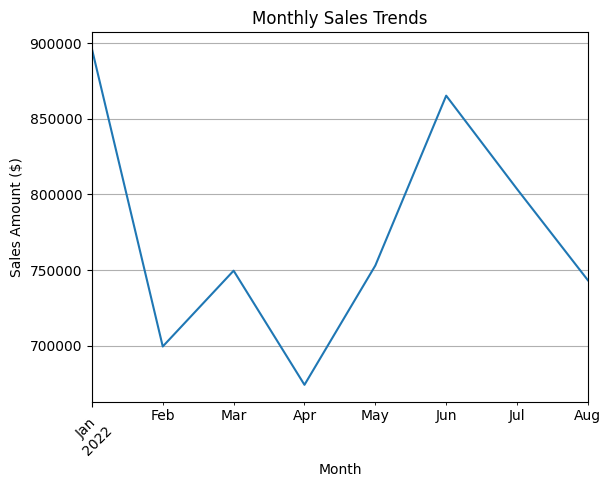

Total sales by month:
Month
2022-01    896105.0
2022-02    699377.0
2022-03    749483.0
2022-04    674051.0
2022-05    752892.0
2022-06    865144.0
2022-07    803425.0
2022-08    743148.0
Freq: M, Name: Amount, dtype: float64


In [56]:
#Monthly sales trend analysis

# Monthly sales trend (visualize)
monthly_sales.plot(kind='line')
plt.title('Monthly Sales Trends')
plt.ylabel('Sales Amount ($)')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Print total sales by month
print("Total sales by month:")
print(monthly_sales)


In [57]:
#Which products are the most profitable per unit sold?

# Average sales per product
avg_sales_per_product = df.groupby('Product')['Amount'].mean()

# Sort products by average sales
sorted_avg_sales = avg_sales_per_product.sort_values(ascending=False)
print("Average sales per product:")
print(sorted_avg_sales)


Average sales per product:
Product
Peanut Butter Cubes     6629.428571
Mint Chip Choco         6310.422222
Choco Coated Almonds    6191.948718
Manuka Honey Choco      6123.133333
99% Dark & Pure         6118.285714
Baker's Choco Chips     6088.121951
85% Dark Bars           5984.580000
Smooth Sliky Salty      5926.983051
Almond Choco            5782.000000
50% Dark Bites          5695.200000
White Choc              5674.948276
Organic Choco Syrup     5667.307692
Raspberry Choco         5515.416667
Milk Bars               5494.857143
Orange Choco            5449.872340
Spicy Special Slims     5434.333333
Caramel Stuffed Bars    5385.767442
After Nines             5226.620000
Eclairs                 5207.416667
Fruit & Nut Bars        5182.940000
70% Dark Bites          5038.333333
Drinking Coco           4583.125000
Name: Amount, dtype: float64


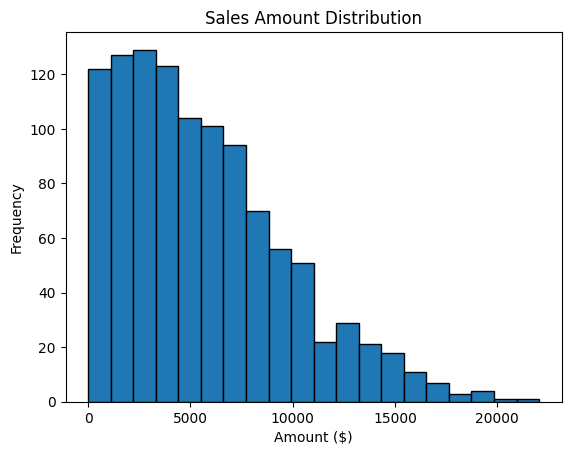

In [58]:
#Sales distribution

# Histogram of sales amounts
df['Amount'].plot(kind='hist', bins=20, edgecolor='black')
plt.title('Sales Amount Distribution')
plt.xlabel('Amount ($)')
plt.ylabel('Frequency')
plt.show()


In [59]:
df

,Sales Person,Country,Product,Date,Amount,Boxes Shipped,Month
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,5320.0,180,2022-01
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,7896.0,94,2022-08
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,4501.0,91,2022-07
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,12726.0,342,2022-04
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,13685.0,184,2022-02
...,...,...,...,...,...,...,...
1089,Karlen McCaffrey,Australia,Spicy Special Slims,2022-05-17,4410.0,323,2022-05
1090,Jehu Rudeforth,USA,White Choc,2022-06-07,6559.0,119,2022-06
1091,Ches Bonnell,Canada,Organic Choco Syrup,2022-07-26,574.0,217,2022-07
1092,Dotty Strutley,India,Eclairs,2022-07-28,2086.0,384,2022-07
